In [226]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import hashlib

sns.set()

In [2]:
from utils.preprocessing import read_excel_sheets
table_names, tables = read_excel_sheets('./data/data.xls')

In [230]:
df = tables[table_names[0]][:115].copy()
df['Surname/Name'] = df['Surname/Name'].apply(lambda x: hashlib.sha256(x.encode()).hexdigest())
df.head()

In [24]:
categorical_raw = tables[table_names[-1]]
quant_raw = tables[table_names[1]]

# categorical 

In [25]:
cat_df = categorical_raw[:115].copy()
cat_df['Surname/Name'] = cat_df['Surname/Name'].apply(lambda x: hashlib.sha256(x.encode()).hexdigest())

In [229]:
cat_df.head(5)

,Surname/Name,Localisation Prim Tum,localisat group,Angiography,CT-AG/AG,PV-embol,ХЭПА,Intraop US,RFA intraop,RFA before,...,C10,C12,C13,14,16,17,18,19,adjuv ther after,cure after
0,bb2d3e75675dc26d5fdfc48049ca4d30498b2315593e0d...,С18.7,2,0,0,0,0,2,2,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
1,ddf3ffd0069c93d8c4cb3a24f21e226e01acc4e5b02ab7...,С20,3,0,0,0,0,1,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
2,522d880e9032a9d8c374f94553e6e03d0ed23bac0f6991...,С20.1,3,ангиогр 22.05.14,2,0,0,1,1,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,NaN
3,727bd25a36d43267dbc2cb45f015e8ffae7a7c13ec6804...,С18.2,1,CT-AG,1,0,0,1,2,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
4,e1d930129f13767c5abd25378ff1653e3c3c4918a0a7fe...,С20.3,3,ХЭПА(Doxo),0,0,1,1,2,2,...,0.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0,"Ффур, ирино метрон, капецит, см"


# quantitative

In [39]:
quant_df= quant_raw[:115].copy()
quant_df['Surname/Name'] = quant_df['Surname/Name'].apply(lambda x: hashlib.sha256(x.encode()).hexdigest())

In [40]:
quant_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115 entries, 0 to 114
Data columns (total 88 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Surname/Name          115 non-null    object 
 1   №№                    115 non-null    float64
 2   Med Rec               115 non-null    object 
 3   Age at operation      115 non-null    float64
 4   number of segments    115 non-null    float64
 5   Sex                   115 non-null    object 
 6   how many LN examined  115 non-null    float64
 7   how many positive     115 non-null    float64
 8   Chemo lines           115 non-null    float64
 9   CEA before            66 non-null     float64
 10  summ size of all mts  115 non-null    float64
 11  Number mts            115 non-null    float64
 12  blood loss, ml        115 non-null    float64
 13  mts max size, mm      115 non-null    float64
 14  Рост                  115 non-null    float64
 15  Вес                   1

# other

In [45]:
q_set = set(quant_raw.columns)
c_set = set(cat_df.columns)
all_set = set(df.columns)

In [46]:
print('Пересечений столбцов исходной талицы и таблицы с категориальными: ', len(all_set&c_set), ", всего последних:", len(c_set), " - ", list(all_set&c_set))
print('Пересечений столбцов исходной талицы и таблицы с количественными: ', len(all_set&q_set), ", всего последних:", len(q_set), " - ", list(all_set&q_set))

Пересечений столбцов исходной талицы и таблицы с категориальными:  47 , всего последних: 47  -  ['CH/T regiment', 'обширн/необширн', 'C8', 'localisat group', 'adjuv ther after', 14, 'Hepatic pathology', 'simult. Y/N', 'aft\\befor\\sinch', 'tipe of CH( adjuv or curative)', 'C12', 16, 17, 18, 'C6', 19, 'vessel invasion', 'Localisation Prim Tum', 'Left/Right lobe', 'prim op plan or emerg', 'Surname/Name', 'RFA intraop', 'Operat volume', 'I/o US new mts', 'C7', 'Target ther', 'C2', 'Angiography', 'simult oper', 'Chemo regim before oper', 'ХЭПА', 'cure after', 'second cancer', 'CT-AG/AG', 'C9', 'time after RFA', 'Intraop US', 'PV-embol', 'I/o US vessels', 'Com1', 'C10', 'RFA before', 'Outcome', 'C3', 'complic y/n0', 'hepar operat', 'C13']
Пересечений столбцов исходной талицы и таблицы с количественными:  87 , всего последних: 88  -  ['prot d0', 'mts max size, mm', 'PTI d0', 'creat6', 'AST 1', 'fibrin1', 'amylas d0', 'K d0', 'Рост', 'Surname/Name', 'Med Rec ', 'Cl d0', 'Hb1', 'CEA before', '

In [47]:
what_columns = list(all_set-q_set-c_set)
print('Не вошедшие в подтаблицы по категор/количеств. признаки: всего их ', len(what_columns), "-", what_columns)

Не вошедшие в подтаблицы по категор/количеств. признаки: всего их  87 - ['ТЭЛА', 'плеврит', 'vessel plast', 'Grade prim', 'PTI-v, %', 'Hb d0', 'fever start', 'Where Pgs?Organ', 'ALT-v', 'V resect hepar, sm2', 'Date of birth', 'R', 'срАД', 'Lobe(l-1,r-2)', 'Unnamed: 179', 'ср ПС', 'Parench dissect', 'anat\\atip\\mix\\split', 'Complicat', 'Time till pgs', 'Long of oper min', 'пат ПС', 'Imag method', 'hipoprot', 'НОП = 706,2 х ППТ + 2,4', 'Necros/distr mts', 'caps invasion', 'AST-v', 'интраоп особенности', 'абсцесс бр пол', 'N', 'печ недостат.1', 'compl y\\n', 'мех желт', 'CEA dinam', 'TrD6/D0', 'Genetic', 'А\\б', 'сост ASA', 'M', 'PET/CT/MRI', 'Num amb', 'нагноен раны', 'печ недостат', 'Month till mts', 'пат АД', 'спайки', 'date of operat', 'discharge, day', 'ВМП/ОМС', 'Age group', 'Shep/mts', 'желчеистечение', 'гемотр ЭР', 'Any diff with CT?', 'ALT D0/6', 'MNO', 'кров более 1 л', 'special things', 'посев', 'Hepat or Sist Pgs', 'Diabetis', 'Cyberknife', 'BMI group', 'Creatin', 'Subcaps/I

In [48]:
df[what_columns].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115 entries, 0 to 114
Data columns (total 87 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ТЭЛА                     115 non-null    float64
 1   плеврит                  115 non-null    float64
 2   vessel plast             115 non-null    object 
 3   Grade prim               115 non-null    object 
 4   PTI-v, %                 110 non-null    float64
 5   Hb d0                    114 non-null    object 
 6   fever start              114 non-null    object 
 7   Where Pgs?Organ          92 non-null     object 
 8   ALT-v                    114 non-null    float64
 9   V resect hepar, sm2      6 non-null      object 
 10  Date of birth            115 non-null    object 
 11  R                        115 non-null    float64
 12  срАД                     114 non-null    object 
 13  Lobe(l-1,r-2)            115 non-null    object 
 14  Unnamed: 179             2

In [111]:
df['TrD6/D0']

0      1.542308
1      1.386364
2      0.087314
3      0.039107
4      0.027183
         ...   
110    1.320856
111    0.994898
112    0.794979
113    0.795053
114    1.458333
Name: TrD6/D0, Length: 115, dtype: float64

In [228]:
plt.rcParams["figure.figsize"] = (20,20)

quant_df.hist()
plt.tight_layout()

<Figure size 1440x1440 with 0 Axes>

In [99]:
df_num = df.loc[:, df.dtypes==float]
corr = np.abs(df_num.corr(method='spearman'))
# corr = df_num.corr()

<AxesSubplot:>

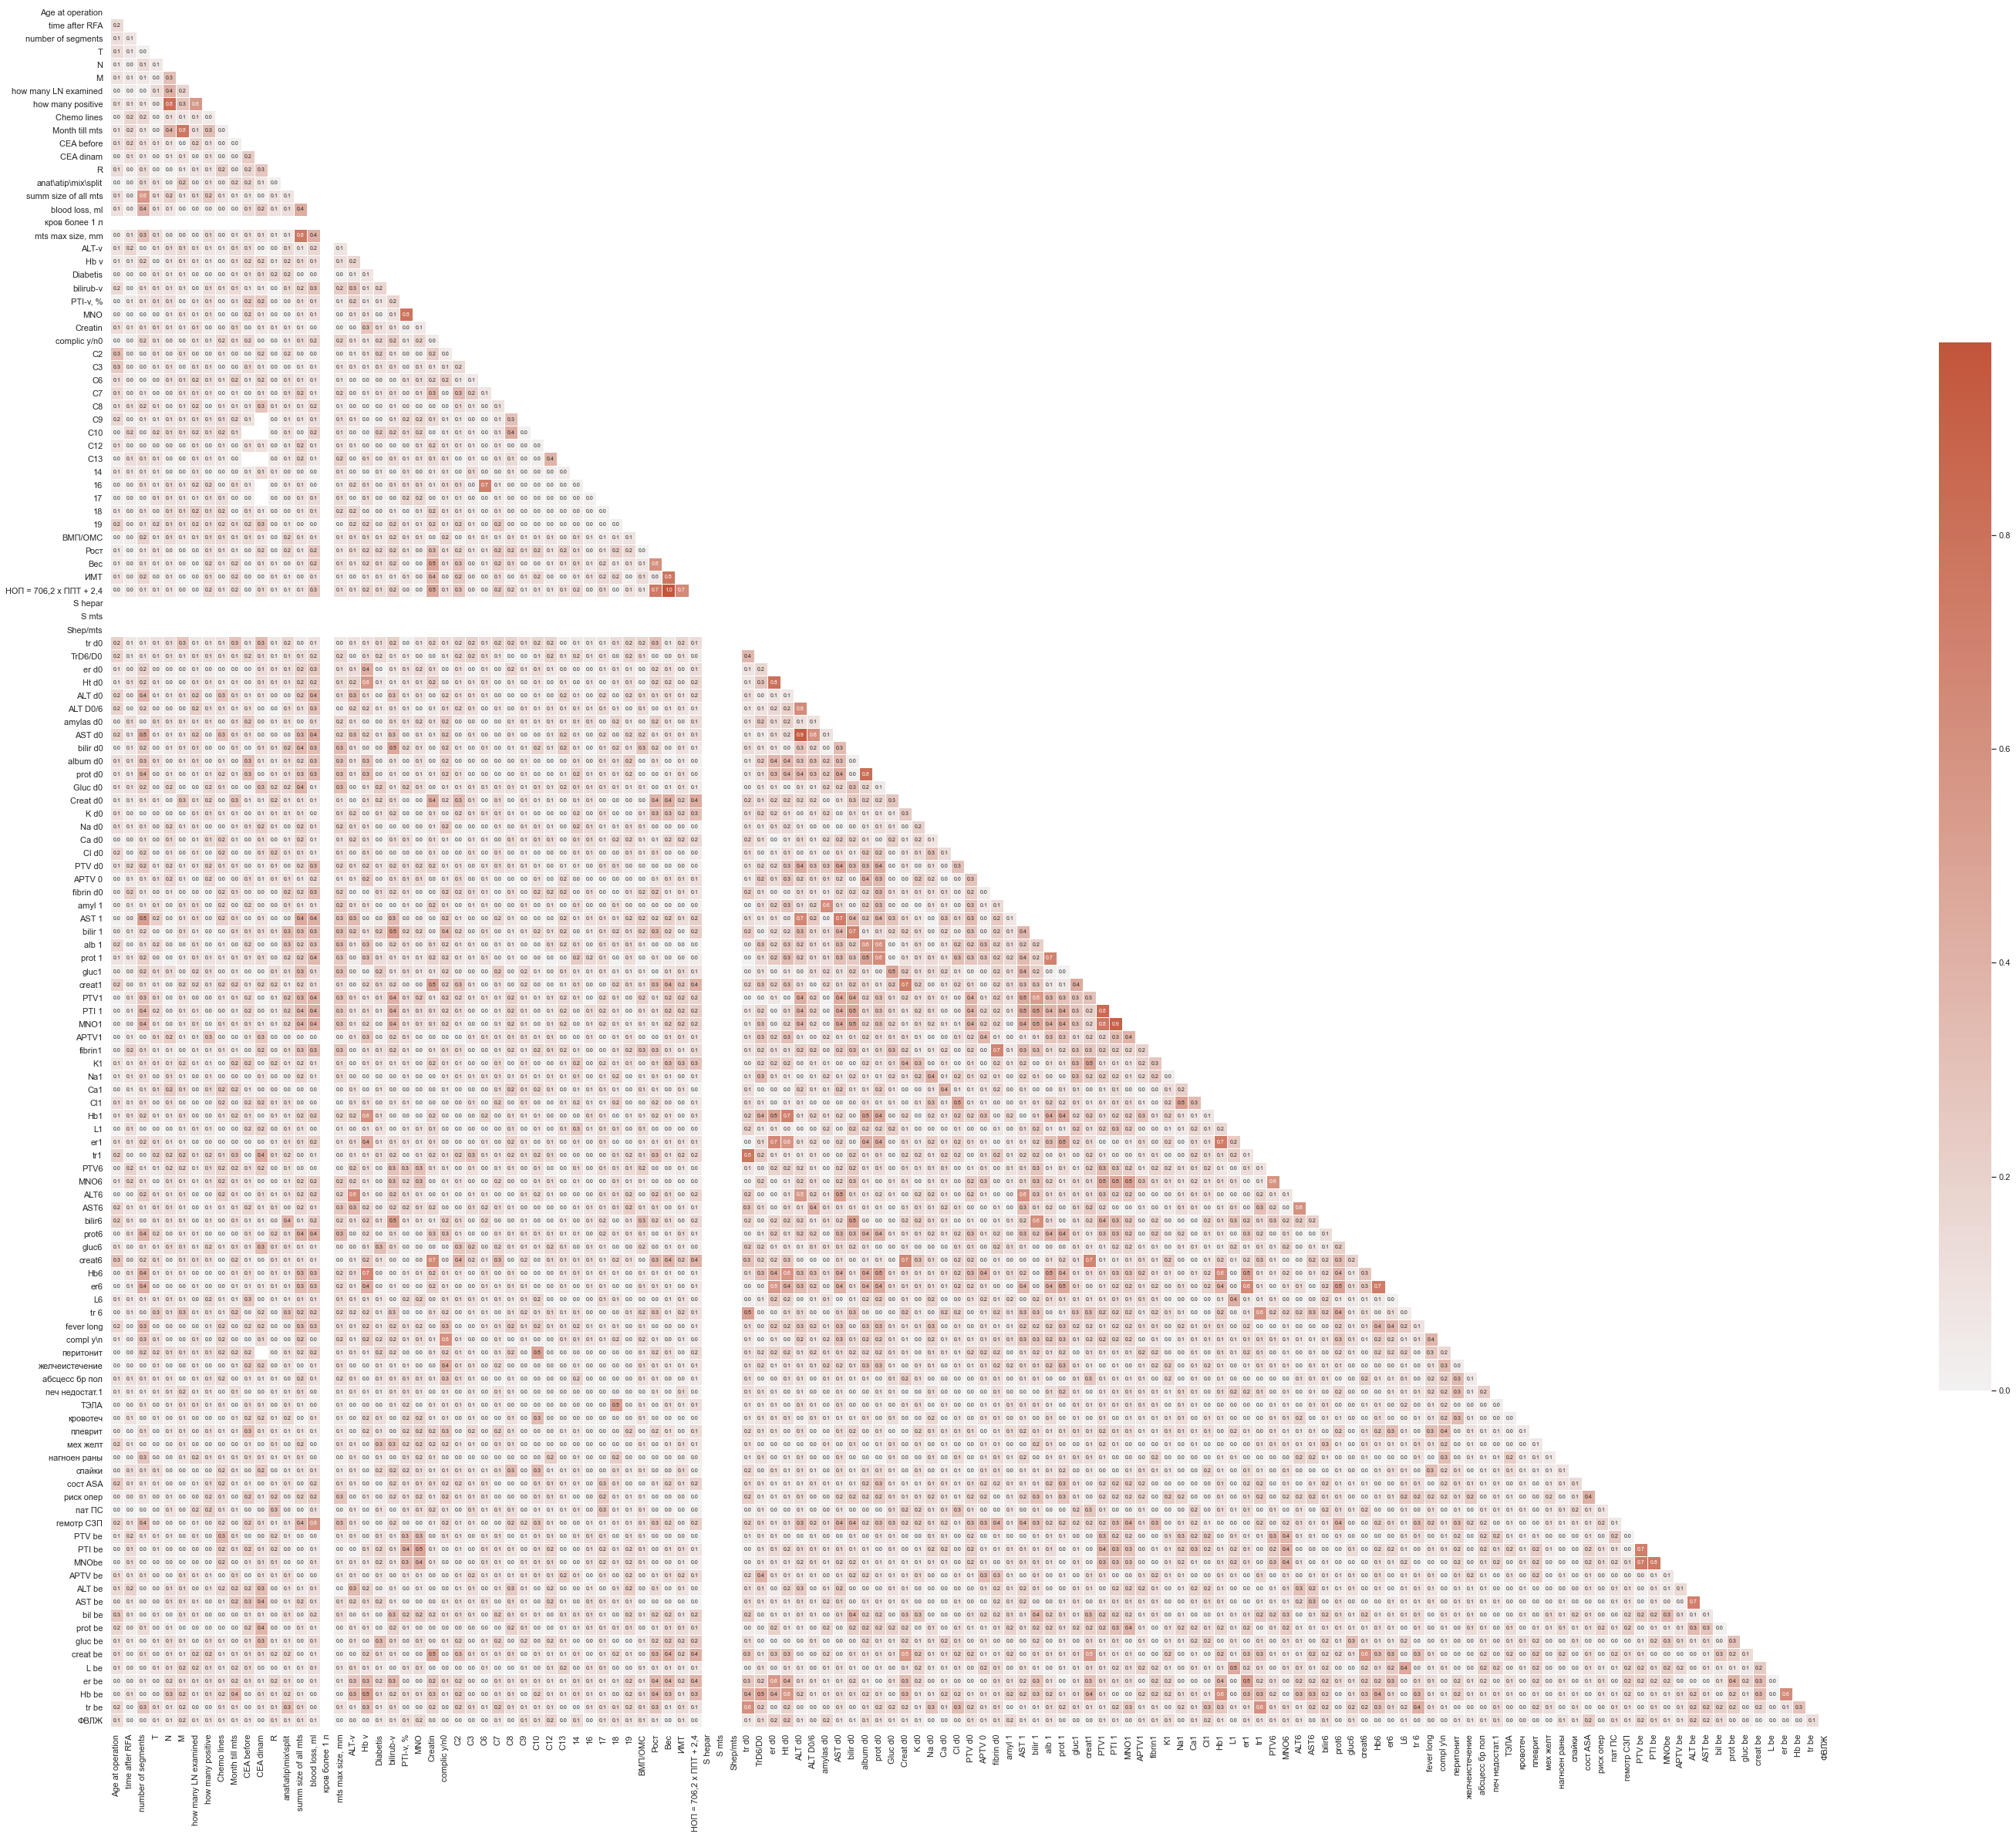

In [109]:
sns.set_theme(style="white")

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(50, 50))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, 
            annot=True, fmt=".1f", annot_kws={"fontsize":7},
            # vmax=.3, 
            center=0,
            square=True, 
            linewidths=.5, 
            cbar_kws={"shrink": .5}
            )


In [110]:
# df.corr(method='pearson').style.background_gradient(cmap='coolwarm', axis=None).set_precision(2)

In [100]:
dict(df.corr()['compl y\\n'].sort_values())

{'prot 1': -0.24936844635867741,
 'Hb v': -0.2441039503841493,
 'alb 1': -0.24114630356872174,
 'Hb6': -0.2318924149452259,
 'prot d0': -0.23017040307447895,
 'er6': -0.18649204960131896,
 'prot6': -0.18187024675754407,
 'ВМП/ОМС': -0.15796159714089,
 'PTI 1': -0.14702986801328433,
 'album d0': -0.14630909268949002,
 'C13': -0.1360648943048311,
 'T': -0.13411323197783018,
 'fibrin d0': -0.13351152713181683,
 'tr1': -0.13126884672171413,
 'Hb1': -0.12042179112584005,
 'tr 6': -0.11672165115896985,
 'PTI be': -0.11664776159960502,
 'ALT D0/6': -0.1158482168787687,
 'L be': -0.11577203270899603,
 14: -0.115511230872642,
 'TrD6/D0': -0.10390621021800316,
 'er1': -0.08492652584472181,
 'C9': -0.07786495679307875,
 17: -0.07786495679307874,
 'MNO': -0.0739511375690344,
 'er d0': -0.07028049490764779,
 'tr d0': -0.06240959032411223,
 'НОП = 706,2 х ППТ + 2,4': -0.0621672421435236,
 'Вес': -0.058314826833749084,
 'PTV be': -0.05774760567970054,
 'Рост': -0.05432217571701736,
 'fibrin1': -0.053

In [70]:
# Послеоперационные признаки
tests_v = [
    'MNO', 'hipoprot', 'Hb v', 'PTI-v, %', 'ALT-v', 'bilirub-v', 
    'AST-v', 'Creatin'
]
# Сразу после операции
tests_d0 = [
    'L d0', 'tr d0', 'er d0', 'Ht d0', 'ALT d0', 'amylas d0',
    'AST d0', 'bilir d0', 'album d0', 'prot d0', 'Gluc d0',
    'Creat d0', 'K d0', 'Na d0', 'Ca d0', 'Cl d0', 'PTV d0',
    'PTI d0', 'APTV 0', 'fibrin d0', 'Hb d0'
]

# Первый день после операции
tests_d1 = [
    'ALT d1', 'amyl 1', 'AST 1', 'bilir 1', 'alb 1',
    'prot 1', 'gluc1', 'creat1', 'PTV1', 'PTI 1', 'MNO1',
    'APTV1', 'fibrin1', 'K1', 'Na1', 'Ca1', 'Cl1', 'Hb1',
    'L1', 'er1', 'tr1'
]

# # Шестой день после операции
tests_d6 = [
    'PTV6', 'PTI6', 'MNO6', 'ALT6', 'AST6', 'bilir6', 'prot6',
    'gluc6', 'creat6', 'Hb6', 'er6', 'L6', 'tr 6'
]

# # Какой-то день после операции
tests_be = [
    'PTV be', 'PTI be', 'MNObe', 'APTV be', 'ALT be', 'AST be',
    'bil be', 'prot be', 'gluc be', 'creat be', 'L be', 'er be',
    'Hb be', 'tr be', 'ФВЛЖ'
]

all_tests = {
    'v': tests_v,
    'd0': tests_d0,
    'd1': tests_d1, 
    'd6': tests_d6,
    'be': tests_be
}

In [188]:
test_columns = set()
for test in all_tests.items():
    t = test[1]
    # t.sort()
    for i in t:
        test_columns.add(i)


In [134]:
common_tests = {
    'ALT': ['ALT-v', 'ALT d0', 'ALT d1', 'ALT6', 'ALT be'],
    'APTV': ['APTV1', 'APTV 0', '', '', 'APTV be'],
    'AST': ['AST-v', 'AST d0', 'AST 1', 'AST6', 'AST be'],
    'Ca': ['', 'Ca d0', 'Ca1', '', ''],
    'Cl': ['', 'Cl d0', 'Cl1', '', ''],
    'Creatin': ['Creatin', 'Creat d0', 'creat1', 'creat6', 'creat be'],
    'Hb': ['Hb v', 'Hb d0', 'Hb1', 'Hb6', 'Hb be'],
    'K': ['', 'K d0', 'K1', '', ''],
    'L': ['', 'L d0', 'L1', 'L6', 'L be'],
    'MNO': ['MNO', '', 'MNO1', 'MNO6', 'MNObe'],
    'Na': ['', 'Na d0', 'Na1', '', ''],
    'PTI': ['PTI-v, %', 'PTI d0', 'PTI 1', 'PTI6', 'PTI be'],
    'PTV': ['', 'PTV1', 'PTV d0', 'PTV6', 'PTV be'],
    'alb': ['',  'album d0', 'alb 1', '', ''],
    'amyl': ['', 'amylas d0', 'amyl 1', '', ''],
    'bil': ['bilirub-v', 'bilir d0', 'bilir 1', 'bilir6', 'bil be'],
    'er': ['', 'er d0', 'er1', 'er6', 'er be'],
    'fibrin': ['', 'fibrin d0', 'fibrin1', '', ''],
    'gluc': ['', 'Gluc d0', 'gluc1', 'gluc6', 'gluc be'],
    'prot': ['', 'prot d0', 'prot 1', 'prot6', 'prot be'],
    'tr': ['', 'tr d0', 'tr1', 'tr 6', 'tr be']
}

# Может быть и для мочи, и для крови:
#   gluc : концентрация глюкозы,  
#   L : лейкоциты (?)
#   er : эритроциты (?)
#   Hb : hemoglobin (?)
#   tr : тромбоциты (?)
#   bil : билирубин
#   Na : sodium
#   prot: протеин, 
#   Ca : Urinary calcium
#   Cl : ?


# Общий анализ мочи: 
#   K : potassium
#   Creatin : Creatinine


# Общий анализ крови:
#   alb: Albumin
#   ALT: АЛТ (аланинаминотрансфераза)
#   AST: АСТ (аспартатаминотрансфераза)
#   amyl: Amylase Амилаза
#   fibrin: Фибриноген

# Анализ венозной крови:
# MNO - МНО (международное нормализованное отношение) — 
#       расчетная величина, характеризующая отношение 
#       протромбинового времени и протромбинового индекса.
# PTV - Протромбиновое время (ПТВ) — это время в секундах, 
#       за которое образуется кровяной сгусток, то есть тромб. 
#       - Увеличение ПТВ может быть связано с кровотечениями, 
#         а его сокращение повышает риск тромбозов.
# PTI - Протромбиновый индекс (ПТИ) — значение, равное 
#       отношению ПТВ контрольного образца к ПТВ исследуемого, 
#       выражается в процентах
# APTV - АЧТВ — активированное частичное тромбопластиновое время — 
#       тест для оценки состояния свертывающей системы крови.
#       1. Удлинение АЧТВ у взрослых и детей говорит о гипокоагуляции — 
#       снижении способности к образованию тромбов. Это увеличивает 
#       риск развития кровотечений.
#       2. Укорочение активированного частичного тромбопластинового 
#       времени отражает преобладание гиперкоагуляции — повышенной 
#       свертываемости крови. 

# TrD6/D0

urine_tests = [
    'gluc', 'prot', 'L', 'er', 'bil', 'Na', 'K', 'Ca',
    'Hb', 'Creatin', 
]
# test_columns

In [222]:
# Почистим немного данные перед рисованием графиков
df['PTI d0'].replace(' ', 0, inplace=True)


tests_df = df[test_columns]
tests_obj_cols = tests_df.select_dtypes(object).columns
# for col in tests_obj_cols:
#     cls = dict(tests_df[col].apply(lambda x: type(x)))
#     for val in cls:
#         if 'int' not in str(cls[val]):
#             print(str(val) + str(cls[val]), end='  \n')
# Получилось, что в этих колонках вперемешку int и float => переведем в float
df.loc[:, test_columns] = df[test_columns].astype(float)
df[test_columns].info()

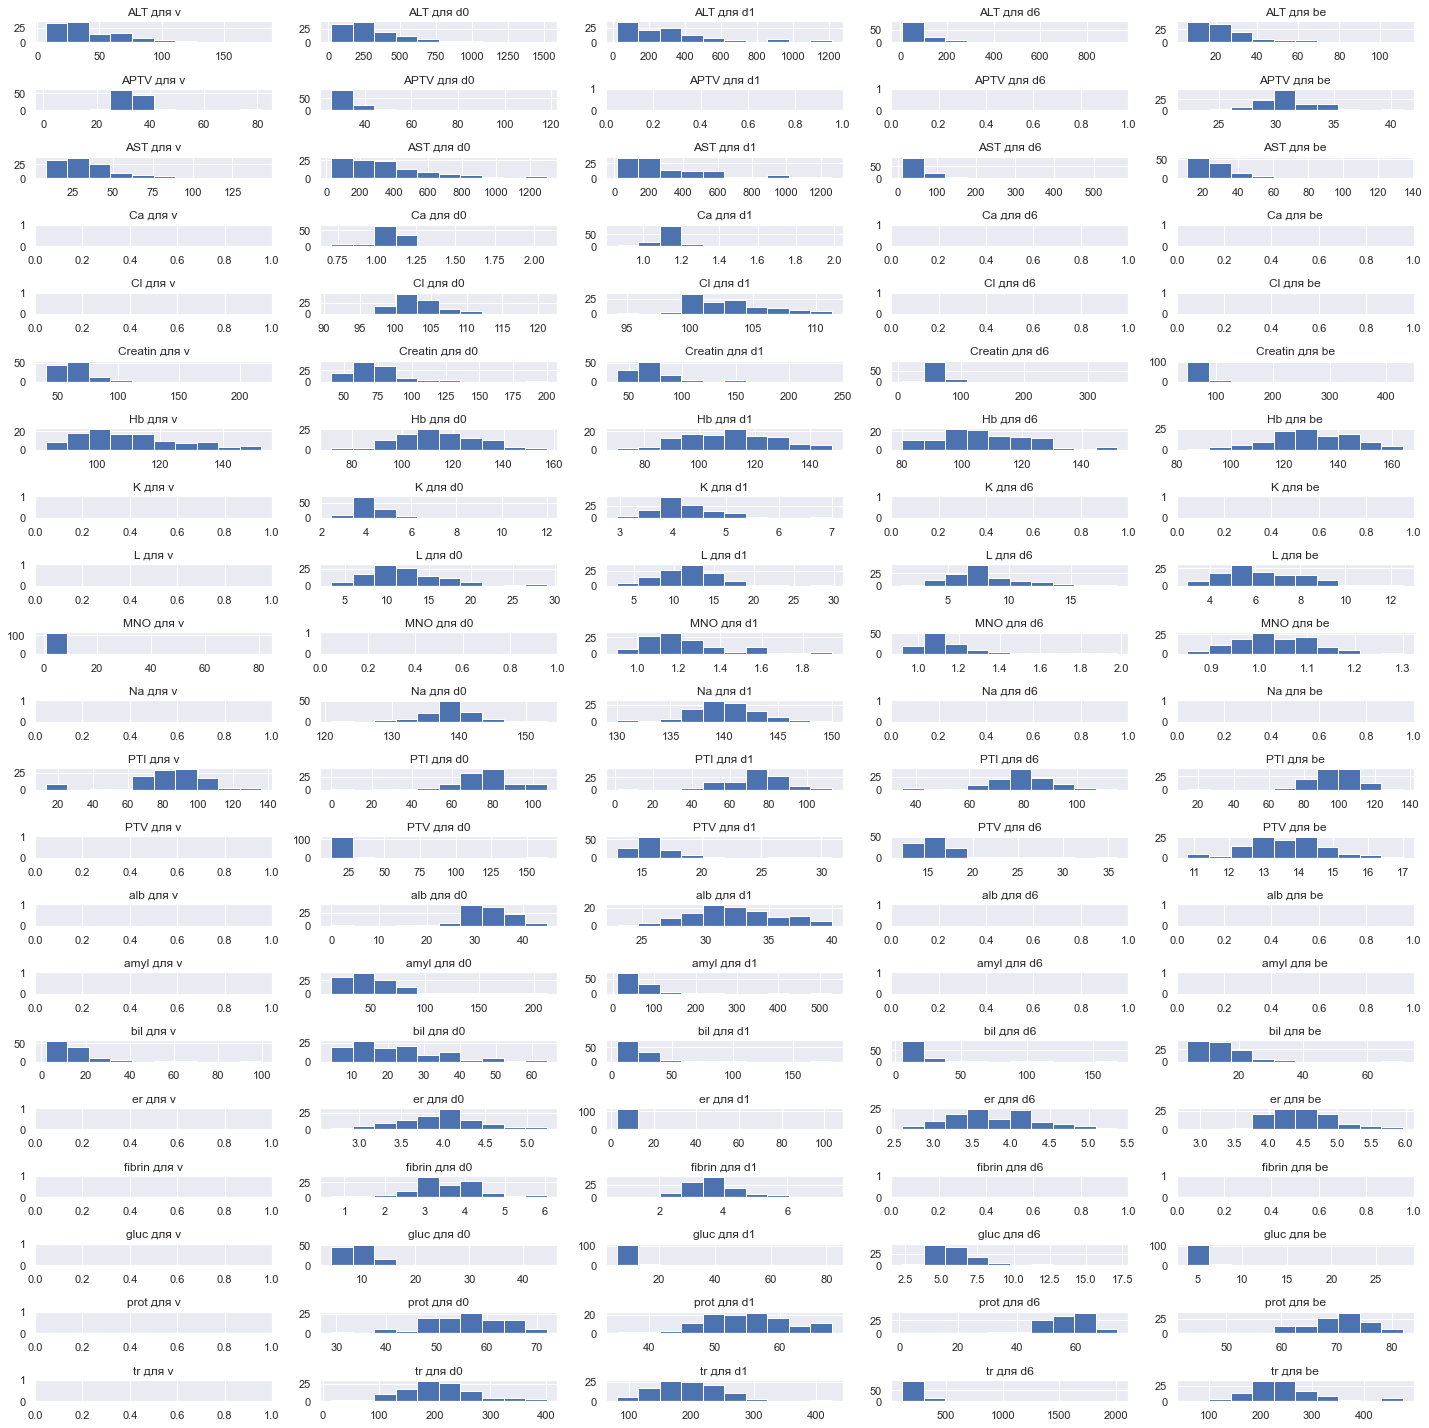

In [227]:
# графики распределения результатов анализа (ось игрек) для разных дней (ось икс)
fig, axes = plt.subplots(nrows=len(common_tests), ncols=len(all_tests))

n = 1
for i, ax in enumerate(axes.flat):
    test = list(common_tests.keys())[int(i / len(all_tests))]
    day = int(i%len(all_tests))
    ax.set(title= test + ' для ' + list(all_tests.keys())[day]) # , xticks=[], yticks=[]
    if common_tests[test][day] != '':
        ax.hist(df[common_tests[test][day]].astype(float))
    
    n += 1


plt.tight_layout()
plt.show()
